In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp

In [29]:
df=pd.read_csv("Q1.csv",header=None)
df=df.sample(frac=1,random_state=48)
df.columns=["y",'x1','x2']
X=df.drop("y",axis=1).values.astype(float)
Y=df['y'].values.astype(float)
Y=np.expand_dims(Y,axis=1)
print(Y.shape)


(100, 1)


In [30]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2

xt,xv,yt,yv=train_test_split(X,Y,0.8)
print(xt.shape,yt.shape,xv.shape,yv.shape)

(80, 2) (80, 1) (20, 2) (20, 1)


In [36]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        n, d = X.shape
        y= y.flatten()
        w= cp.Variable(d)
        b= cp.Variable()
        xi= cp.Variable(n,nonneg=True)
        objective= cp.Minimize(cp.norm(w, 2)**2 + self.C * cp.sum(xi))
        constraints= [cp.multiply(y, X @ w + b) >= 1 - xi]
        prob =cp.Problem(objective, constraints)
        prob.solve()
        self.w= w.value
        self.b= b.value
        margin= y*(X@self.w + self.b)
        support_idx=np.where(margin<= 1 + 1e-5)[0]
        self.support_vectors=X[support_idx]

    def predict(self, X):
        return np.sign(X@self.w + self.b)

    def accuracy(self, X, y):
        preds = self.predict(X)
        return np.mean(preds== y.flatten())

    def plot(self,X_train,y_train, X_val, y_val):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train[y_train.flatten() == 1][:, 0], X_train[y_train.flatten() == 1][:, 1],
                    color='red', marker='^', label='Train +1')
        plt.scatter(X_train[y_train.flatten() == -1][:, 0], X_train[y_train.flatten() == -1][:, 1],
                    color='blue', marker='^', label='Train -1')

        plt.scatter(X_val[y_val.flatten() == 1][:, 0], X_val[y_val.flatten() == 1][:, 1],
                    c="pink", edgecolors='red', marker='o', label='Val +1')
        plt.scatter(X_val[y_val.flatten() == -1][:, 0], X_val[y_val.flatten() == -1][:, 1],
                    c="cyan", marker='o', label='Val -1')

        ax= plt.gca()
        xlim= ax.get_xlim()
        xx= np.linspace(xlim[0], xlim[1], 200)
        yy = -(self.w[0] * xx + self.b) / self.w[1]
        margin = 1 / np.linalg.norm(self.w)
        yy_margin_up = yy + margin
        yy_margin_down = yy - margin

        plt.plot(xx, yy, 'k-', label='Decision boundary')
        plt.plot(xx, yy_margin_up, 'k--',)
        plt.plot(xx, yy_margin_down, 'k--',)

        # Support vectors
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='green', label='Support Vectors')

        plt.legend()
        plt.show()

[-2.45189854  1.71402821] 2.322272788417004
Training Accuracy: 1.0
Validation Accuracy: 1.0


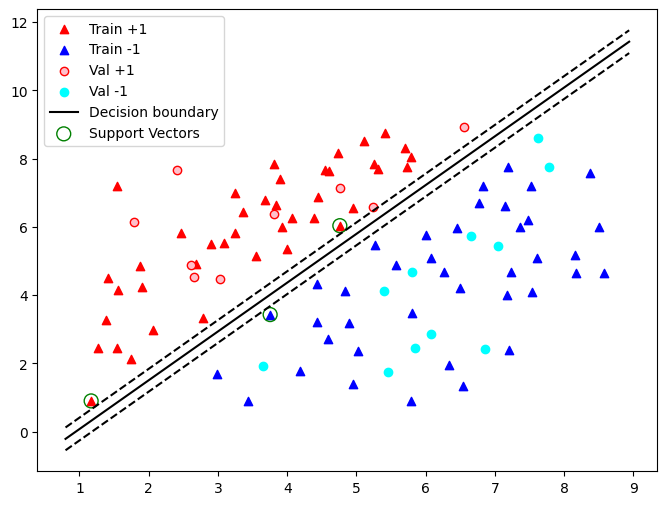

In [37]:
svm = SVM(C=10.0)
svm.fit(xt, yt)
print(svm.w,svm.b)
print("Training Accuracy:", svm.accuracy(xt, yt))
print("Validation Accuracy:", svm.accuracy(xv, yv))
svm.plot(xt, yt, xv, yv)